# Linear Models

In this notebook we will discuss our first model regarding the classification task given in our project of predicting recidivism. <br>
The sub-headers below explain the subsequent steps taken.

## Outline

* [Packages](#Packages)
* [Functions](#Functions)
* [Data Import & Scaling](#Data-Import-&-Scaling)
* [Logistic Regression - Modeling and Hyperparametertuning](#Logistic-Regression-Modeling)
* [Interpretation of Logistic Regression & Performance](#Interpretation-log)
* [The effect of race on our target](#effect-race)
* [Feature Importance](#feature-importance)
* [Logistic Regression excluding race](#log-excl-race)
* [The effect of race on our model without the model knowing the feature](#excl-race-effect-race)
* [Predict race based on the features](#predict-race)
* [Final Conclusions](#final-conc)
* [Appendix](#appendix)

### <a name="Packages"></a>Packages 

At first we load the relevant packages

In [482]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, log_loss, plot_roc_curve, auc, plot_confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import partial_dependence, plot_partial_dependence, PartialDependenceDisplay
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import scale
from sklearn.inspection import PartialDependenceDisplay
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from IPython.display import Image, display_svg, SVG
from sklearn.ensemble import GradientBoostingClassifier
import networkx as nx

In [412]:
pd.set_option('display.max_columns', None)

### <a name="Functions"></a>Functions

In [413]:
# function calculating the metrics of a confusion metrics for a model

def confusionmatrix(model, X_test, y_test, y_pred):
    conf_mat_log = plot_confusion_matrix(model,
                     X_test,
                     y_test,
                      values_format='d',
                     display_labels=["Did not recidivise","Did recidivise"])

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    print(tn, fp, fn, tp)

    fnr = fn/(fn+tp)

    fpr = fp/(fp+tn)

    tpr = tp/(tp+fn)

    tnr = tn/(tn+fp)

    ppv = tp/(tp+fp)

    npv = tn/(tn+fn)
    
    print(f"The Accuracy is {accuracy_score(y_test, y_pred).round(2)}")
    print(f"The False-negative-rate is {np.round(fnr, 2)}")
    print(f"The False-positive-rate is {np.round(fpr, 2)}")
    print(f"The Sensitivity or True-positive-rate is {np.round(tpr, 2)}")
    print(f"The Specitivity or True-negative-rate is {np.round(tnr, 2)}")
    print(f"The Positive-predictive value or precision is {np.round(ppv, 2)}")
    print(f"The Negative-predictive value or recall is {np.round(npv, 2)}")

In [414]:
#Creating function for the rates without plotting the confusion matrix

def confusion_matrix_rate(y_test, y_pred):
    conf_mat = pd.crosstab(y_pred, y_test)

    conf_mat

    tn = conf_mat[0][0]
    fp = conf_mat[0][1]
    fn = conf_mat[1][0]
    tp = conf_mat[1][1]

    print(tp, tn, fp, fn)

    fnr = fn/(fn+tp)

    fpr = fp/(fp+tn)

    tpr = tp/(tp+fn)

    tnr = tn/(tn+fp)

    ppv = tp/(tp+fp)

    npv = tn/(tn+fn)

    print(f"The False-negative-rate is {np.round(fnr, 2)}")
    print(f"The False-positive-rate is {np.round(fpr, 2)}")
    print(f"The Sensitivity or True-positive-rate is {np.round(tpr, 2)}")
    print(f"The Specitivity or True-negative-rate is {np.round(tnr, 2)}")
    print(f"The Positive-predictive value or precision is {np.round(ppv, 2)}")
    print(f"The Negative-predictive value or recall is {np.round(npv, 2)}")
    print(f"The Accuracy is {accuracy_score(y_test, y_pred).round(2)}")

### <a name="Data-Import-&-Scaling"></a>Data Import & Scaling

First we import our csv that we created in the preprocessing step

In [415]:
# data import

path = r"C:\Users\felix\Data Science\Project_Data_Science\df_for_modeling_ds.csv"

path2 = r"C:\Users\felix\Data Science\Project_Data_Science\df_for_modeling_no_dummies.csv"

df = pd.read_csv(path, index_col=0)

df_2 = pd.read_csv(path2, index_col=0)

df.head()

,sex_Male,race_Asian,race_Caucasian,race_Hispanic,race_Native American,race_Other,marital_status_Married,marital_status_Separated,marital_status_Significant Other,marital_status_Single,marital_status_Unknown,marital_status_Widowed,is_recid,is_violent_recid,age,juv_fel_count,juv_misd_count,juv_other_count,highest_degree_charged,count_deg_0,count_deg_1,count_deg_2,count_deg_3,count_deg_4,count_deg_5,total_prior_charges,max_charge_incid,ear_charge_age,two_year_recid
0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,69,0,0,0,3,4,0,1,1,0,0,6,2,62,0
1,1,0,0,0,0,0,0,0,0,1,0,0,1,1,34,0,0,0,3,0,0,0,1,0,0,1,1,31,1
2,1,0,0,0,0,0,0,0,0,1,0,0,1,0,24,0,0,1,3,6,3,6,4,0,0,19,5,17,1
5,1,0,0,0,0,1,0,1,0,0,0,0,0,0,44,0,0,0,2,0,0,1,0,0,0,1,1,42,0
6,1,0,1,0,0,0,0,0,0,1,0,0,1,0,41,0,0,0,4,4,3,4,13,3,0,27,4,19,1


In [416]:
ratio_recid = df.groupby("two_year_recid")["two_year_recid"].count()

print(f" In total our amount of recidivated and non-recidivated people, looks as follows: \n {ratio_recid}")

 In total our amount of recidivated and non-recidivated people, looks as follows: 
 two_year_recid
0    3365
1    2856
Name: two_year_recid, dtype: int64


Given the high values in age and total_prior_charges, let us assess the distribution and potential outliers.

<AxesSubplot:ylabel='highest_degree_charged'>

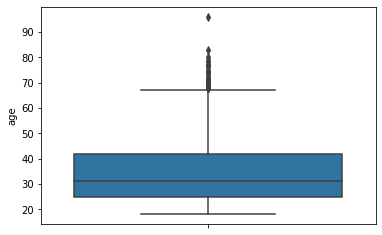

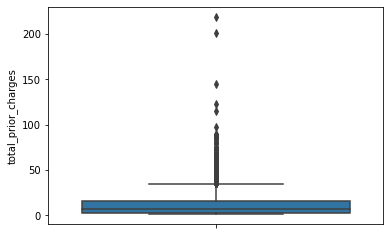

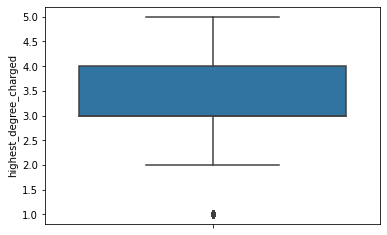

In [417]:
ages = df["age"]

prior_counts = df["total_prior_charges"]

degree_charged = df["highest_degree_charged"]

plt.figure()
sns.boxplot(y = ages)
plt.figure()
sns.boxplot(y = prior_counts)
plt.figure()
sns.boxplot(y = degree_charged)

<Figure size 432x288 with 0 Axes>

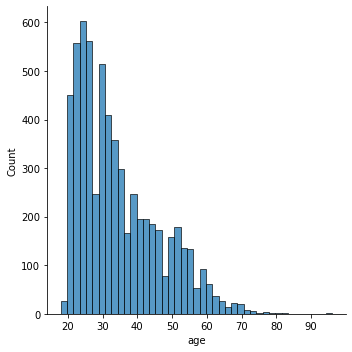

<Figure size 432x288 with 0 Axes>

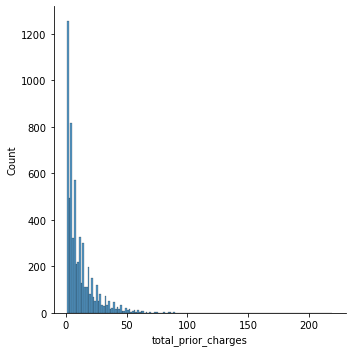

<Figure size 432x288 with 0 Axes>

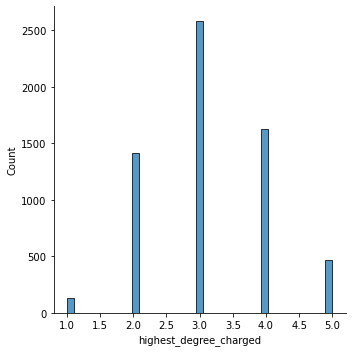

In [290]:
plt.figure()
sns.displot(ages)
plt.figure()
sns.displot(prior_counts)
plt.figure()
sns.displot(degree_charged)

Assessing the distribution and the box plots of the coloumns age and total prior charges, we can observe multiple things: <br>
1. Both of them are sensitive to outliers
2. They are not normally distributed
3. Both of them suffer from a big tail to the right.

Since for example the feature highest_degree_charged appears to be normally distributed and there exist several dummy encoded features, a form of scaling will be necessary. <br>
Let us therefore discuss the scaling options available and which choice would be best: <br>
<br>
Min-Max-Scaler: Performs well on a small standard deviation and a non-Gaussian distribution, however, it is sensitive to outliers -> not the optimal choice <br>
Standard Scaler: Not optimal to use, when the given data set is not normally distributed -> not the optimal choice <br>
Max Abs Scaler: Performs well on positive only data, but also suffers from the existence of outliers -> not the optimal choice <br>
Robust Scaler: Performs well on outliers since it only evaluates the data based on the IQR-> possible choice <br> 
Quantile Transformer Scaler/Rank Scaler: Transforms features to follow a normal distribution and tends to spread out the most frequent values -> possible choice <br>
Power Transformer Scaler: similar application to the Quantile Transformer: Transforms features to follow a normal distribution <br>

Given the fact, that the quantile transformer will force the non-binary features to be scaled between 0-1 which is handy for comparing against dummy variables, and force the values to adopt to a more normally distributed shape, it is our choice of scaling.

In [418]:
# dropping the targets

y_1 = df["two_year_recid"]

y_2 = df["is_violent_recid"]

df = df.drop(["is_recid", "is_violent_recid"], axis = 1)

# we scale the non-dummy encoded data

X_scale = df.iloc[:,12:26]

X_dummy = df.iloc[:,0:12]

In [419]:
X_scale.head(5)

,age,juv_fel_count,juv_misd_count,juv_other_count,highest_degree_charged,count_deg_0,count_deg_1,count_deg_2,count_deg_3,count_deg_4,count_deg_5,total_prior_charges,max_charge_incid,ear_charge_age
0,69,0,0,0,3,4,0,1,1,0,0,6,2,62
1,34,0,0,0,3,0,0,0,1,0,0,1,1,31
2,24,0,0,1,3,6,3,6,4,0,0,19,5,17
5,44,0,0,0,2,0,0,1,0,0,0,1,1,42
6,41,0,0,0,4,4,3,4,13,3,0,27,4,19


In [420]:
X_dummy.head(5)

,sex_Male,race_Asian,race_Caucasian,race_Hispanic,race_Native American,race_Other,marital_status_Married,marital_status_Separated,marital_status_Significant Other,marital_status_Single,marital_status_Unknown,marital_status_Widowed
0,1,0,0,0,0,1,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,1,0,0
5,1,0,0,0,0,1,0,1,0,0,0,0
6,1,0,1,0,0,0,0,0,0,1,0,0


In [421]:
# We scale the data 

scaled_features = QuantileTransformer().fit_transform(X_scale.values)
#scaled_features = StandardScaler().fit_transform(X_scale.values)
scaled_features_df = pd.DataFrame(scaled_features, index=X_scale.index, columns=X_scale.columns)

In [422]:
# we merge the data back together

X = pd.concat([X_dummy, scaled_features_df], axis = 1)

X.head()

,sex_Male,race_Asian,race_Caucasian,race_Hispanic,race_Native American,race_Other,marital_status_Married,marital_status_Separated,marital_status_Significant Other,marital_status_Single,marital_status_Unknown,marital_status_Widowed,age,juv_fel_count,juv_misd_count,juv_other_count,highest_degree_charged,count_deg_0,count_deg_1,count_deg_2,count_deg_3,count_deg_4,count_deg_5,total_prior_charges,max_charge_incid,ear_charge_age
0,1,0,0,0,0,1,0,0,0,1,0,0,0.994494,0.0,0.0,0.000000,0.455455,0.646146,0.000000,0.382883,0.462462,0.000000,0.0,0.438438,0.314314,0.992993
1,1,0,0,0,0,0,0,0,0,1,0,0,0.585085,0.0,0.0,0.000000,0.455455,0.000000,0.000000,0.000000,0.462462,0.000000,0.0,0.000000,0.000000,0.756256
2,1,0,0,0,0,0,0,0,0,1,0,0,0.191692,0.0,0.0,0.951952,0.455455,0.751752,0.751752,0.909409,0.837838,0.000000,0.0,0.807307,0.845345,0.104104
5,1,0,0,0,0,1,0,1,0,0,0,0,0.783283,0.0,0.0,0.000000,0.134134,0.000000,0.000000,0.382883,0.000000,0.000000,0.0,0.000000,0.000000,0.891391
6,1,0,1,0,0,0,0,0,0,1,0,0,0.736236,0.0,0.0,0.000000,0.793794,0.646146,0.751752,0.827828,0.977978,0.936937,0.0,0.893393,0.724224,0.332332


<Figure size 432x288 with 0 Axes>

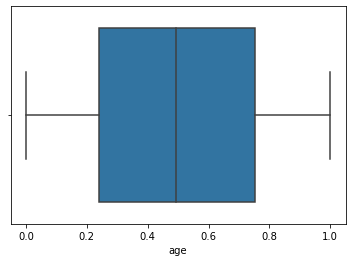

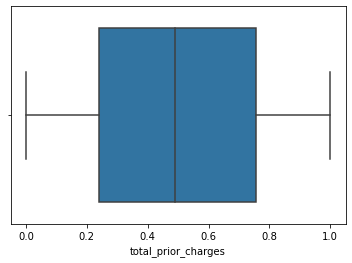

<Figure size 432x288 with 0 Axes>

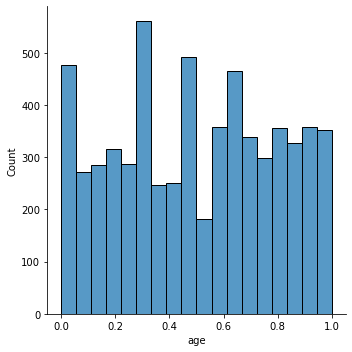

<Figure size 432x288 with 0 Axes>

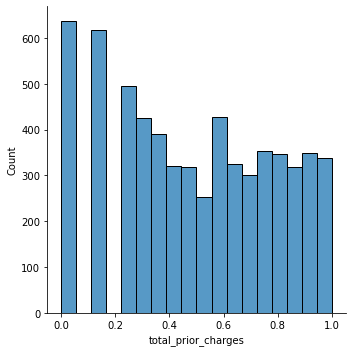

<Figure size 432x288 with 0 Axes>

In [423]:
plt.figure()
sns.boxplot(x = X["age"])
plt.figure()
sns.boxplot(x = X["total_prior_charges"])
plt.figure()
sns.displot(x = X["age"])
plt.figure()
sns.displot(x = X["total_prior_charges"])
plt.figure()

Given the succesful scaling between 0 - 1 as shown above, we proceed to split the data into train and test set:

In [424]:
sum(y_1)/len(y_1)

X_train, X_test, y_train, y_test = train_test_split(X, y_1 ,random_state = 42, stratify = y_1)

sum(y_train)/len(y_train)

sum(y_test)/len(y_test)

0.4588688946015424

### <a name="Logistic-Regression-Modeling"></a>Logistic Regression - Modeling and Hyperparametertuning

At first we hypertune our model to find the optimal parameters and use them later on for the model

In [425]:
# modeling the logistic regression 

log = LogisticRegression(max_iter=10000, tol=0.1)

params = {"penalty":["none", "l2"]}

gd_log = GridSearchCV(log, param_grid = params, cv = 10)

gd_log.fit(X_train, y_train)

best_param_log = gd_log.best_params_

print(best_param_log)

{'penalty': 'none'}


Given the best penalty to be used in the logistic regression, we now apply the model to with the given parameters to the test-set.

In [426]:
log_tuned = LogisticRegression(penalty = best_param_log["penalty"], random_state = 42, max_iter = 10000, tol = 0.1)

log_tuned.fit(X_train, y_train)

y_pred_proba_log = log_tuned.predict_proba(X_test)[:,1]

y_pred_log = log_tuned.predict(X_test)

The AUC of our model is 0.7561253717639075


Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


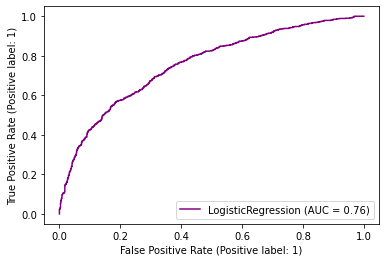

In [427]:
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, y_pred_proba_log)

plot_roc_curve(log_tuned, X_test, y_test, color="purple")

roc_auc_log = auc(fpr_log, tpr_log)

print(f"The AUC of our model is {roc_auc_log}")

### <a name="Interpretation-log"></a>Interpretation of Logistic Regression & Performance

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


625 217 273 441
The Accuracy is 0.69
The False-negative-rate is 0.38
The False-positive-rate is 0.26
The Sensitivity or True-positive-rate is 0.62
The Specitivity or True-negative-rate is 0.74
The Positive-predictive value or precision is 0.67
The Negative-predictive value or recall is 0.7


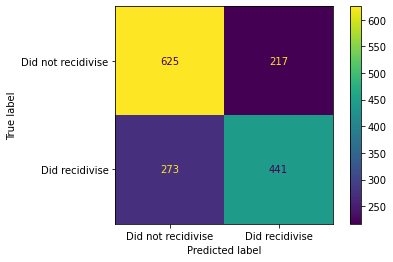

In [430]:
confusionmatrix(log_tuned, X_test, y_test, y_pred_log)

Evaluating the performance of the model, we can observe that the performance has an accuracy of around 69 percent, meaning that in 69 percent of the cases we made the right decision, independent of whether the person recidivated or not. However, this is not a metric that is accurate enough in classification to understand in which direction our Logistic regression is performing better or worse. <br>
Given the real-life implications of a right or wrong decision (either wrongfully being held in prison or wrongfully being released regardless of falling back into crime), looking at other tendencies of our model is important. <br>
<br>
Comparing the False-negative-rate and the False-positive-rate, we observe a much higher False-negative-rate, i.e. in reality our model would have been much more likely to let people free that recidivated later. <br>
Looking at the high level of specitivity of 74%, we can deduct that we are much better at predicting people that are not recidivating with our model than the ones that actually recidivate. <br>
Evaluating the recall, we observe that our model simply isn't good enough in retriving enough relevant people. <br>
<br>
The key takeaway in one sentence about the logistic regression could be, our model is better at predicting who will not recidivise than who will recidivise, which kind of defeats the point of this classification task.<br> 
Now let us look at what features our model used most for prediction and which ones where most relevant when predicting on an unseen test data set. 


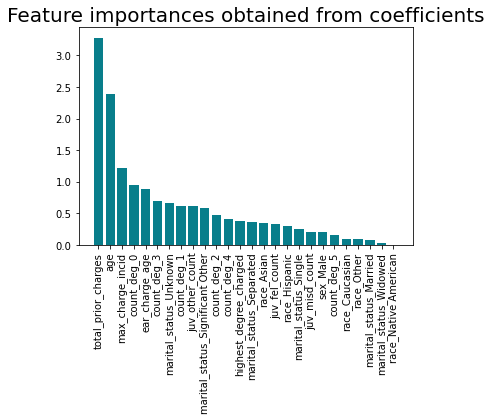

In [431]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(log_tuned.coef_[0])
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

Evaluating the coefficients, it seems as if the total_prior charges and counts within the degrees are important, whereas the most prominent feature is age. We will take this into consideration when comparing with other methods of evaluating feature importance. 

Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead


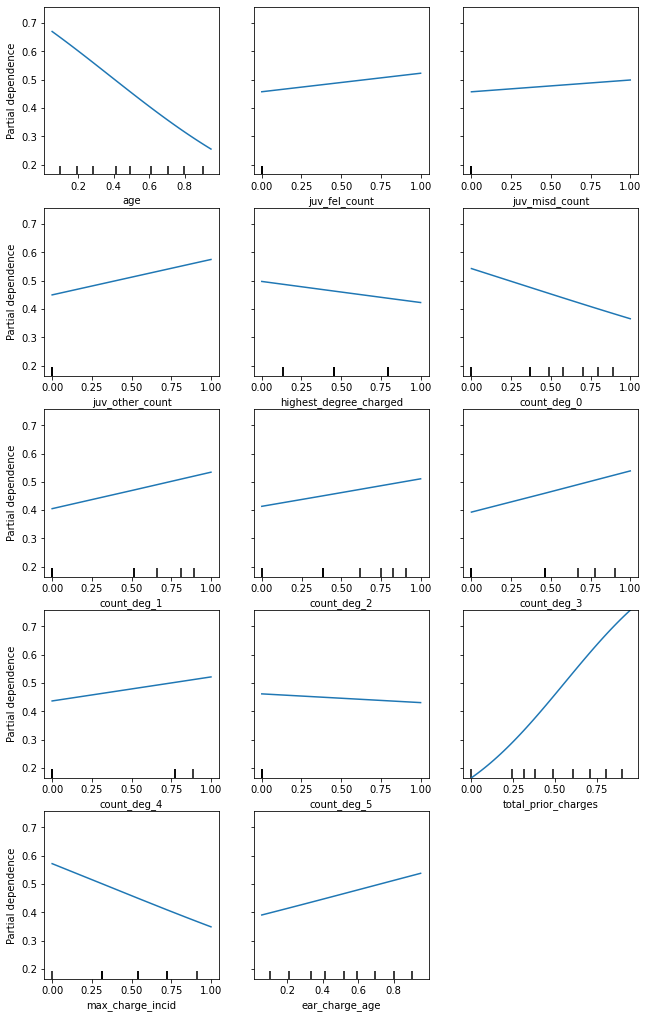

In [432]:
features = X_train.columns

display = plot_partial_dependence(log_tuned, X_train, features[12:26], n_jobs=11 ,grid_resolution=50, kind="average")

plt.subplots_adjust(top = 3.5, right = 1.5)


Assessing the PDP's on the aformentioned features that were considered to have a high impact on the model, we observe a similar pattern, an increasing age drastically reduces the chance of recidivising, whereas the counts within the given degrees as well as the total prior charges will increase the probability of our model predicting recidivism. <br>
Given the fact, that the total prior charges consist of the sum of the individual count degrees for that specific person, it is highly likely that our model created improbable samples during the construction of the PDP's. Therefore, we want to cross-validate our findings by looking at how the model's feature perform in relation to each other using Shapley values:

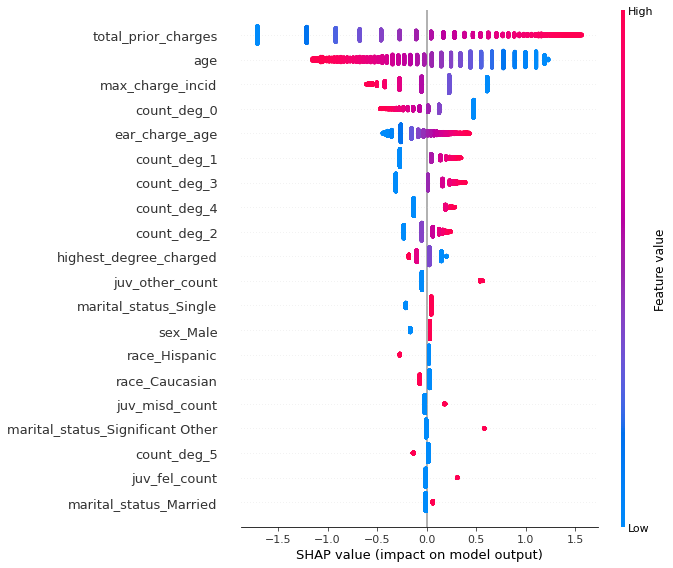

In [433]:
import shap

# explain the model's predictions on test set using SHAP values
explainer = shap.LinearExplainer(log_tuned, X_train)

# shap_values consists of a list of two matrices of dimension samplesize x #features
shap_values = explainer.shap_values(X_train)

#A summary plot with the shapley value (feature importance) 
shap.summary_plot(shap_values, X_train)

The shapley values confirm our findings, total prior charges, age, the amount if charges at an incident and the counts within the degrees seem to be most important for our model to predict recidivism. We take this into account when comparing against other models.

### <a name="effect-race"></a>The effect of race on our target

Given the overall prediction of our model, we saw that we are around the same accuracy as the Compass score to predict whether a person will fall back into crime. However, it doesnt tell us to which extent defendants are racially discriminated and how they are treated depending on their race. We will as such seperate the effect of being African American against being Non-african american.

In order to do this, we add the predictions and true incidents back to our model.

In [438]:
X_test_copy = X_test.copy()

X_test_copy.head()

,sex_Male,race_Asian,race_Caucasian,race_Hispanic,race_Native American,race_Other,marital_status_Married,marital_status_Separated,marital_status_Significant Other,marital_status_Single,marital_status_Unknown,marital_status_Widowed,age,juv_fel_count,juv_misd_count,juv_other_count,highest_degree_charged,count_deg_0,count_deg_1,count_deg_2,count_deg_3,count_deg_4,count_deg_5,total_prior_charges,max_charge_incid,ear_charge_age
1664,0,0,0,0,0,0,0,0,0,1,0,0,0.191692,0.0,0.0,0.0,0.455455,0.000000,0.512513,0.000000,0.462462,0.000000,0.0,0.152152,0.000000,0.332332
2220,1,0,0,1,0,0,1,0,0,0,0,0,0.736236,0.0,0.0,0.0,0.793794,0.000000,0.000000,0.748248,0.000000,0.771772,0.0,0.315816,0.724224,0.862362
2023,1,0,0,0,0,0,0,0,0,1,0,0,0.611111,0.0,0.0,0.0,0.134134,0.486486,0.661161,0.382883,0.000000,0.000000,0.0,0.381381,0.314314,0.518018
1927,1,0,1,0,0,0,0,0,0,1,0,0,0.768268,0.0,0.0,0.0,0.134134,0.486486,0.000000,0.827828,0.000000,0.000000,0.0,0.438438,0.910911,0.881882
5421,1,0,0,0,0,0,0,0,0,1,0,0,0.330831,0.0,0.0,0.0,0.134134,0.646146,0.661161,0.382883,0.000000,0.000000,0.0,0.489489,0.541041,0.409910


In [439]:
X_test_copy["predictions"] = y_pred_log
X_test_copy["true_values"] = y_test

In [440]:
X_test_copy.head()

,sex_Male,race_Asian,race_Caucasian,race_Hispanic,race_Native American,race_Other,marital_status_Married,marital_status_Separated,marital_status_Significant Other,marital_status_Single,marital_status_Unknown,marital_status_Widowed,age,juv_fel_count,juv_misd_count,juv_other_count,highest_degree_charged,count_deg_0,count_deg_1,count_deg_2,count_deg_3,count_deg_4,count_deg_5,total_prior_charges,max_charge_incid,ear_charge_age,predictions,true_values
1664,0,0,0,0,0,0,0,0,0,1,0,0,0.191692,0.0,0.0,0.0,0.455455,0.000000,0.512513,0.000000,0.462462,0.000000,0.0,0.152152,0.000000,0.332332,0,0
2220,1,0,0,1,0,0,1,0,0,0,0,0,0.736236,0.0,0.0,0.0,0.793794,0.000000,0.000000,0.748248,0.000000,0.771772,0.0,0.315816,0.724224,0.862362,0,1
2023,1,0,0,0,0,0,0,0,0,1,0,0,0.611111,0.0,0.0,0.0,0.134134,0.486486,0.661161,0.382883,0.000000,0.000000,0.0,0.381381,0.314314,0.518018,0,0
1927,1,0,1,0,0,0,0,0,0,1,0,0,0.768268,0.0,0.0,0.0,0.134134,0.486486,0.000000,0.827828,0.000000,0.000000,0.0,0.438438,0.910911,0.881882,0,0
5421,1,0,0,0,0,0,0,0,0,1,0,0,0.330831,0.0,0.0,0.0,0.134134,0.646146,0.661161,0.382883,0.000000,0.000000,0.0,0.489489,0.541041,0.409910,0,0


The shape of the dataset based on the random state is given below.

In [442]:
X_test_copy.shape

(1556, 28)

We now subset for non-african american and the rest to observe the predictive value for race

In [443]:
# subset for race african american 

X_afr = X_test_copy[(X_test_copy["race_Asian"] == 0) & (X_test_copy["race_Caucasian"] == 0) & (X_test_copy["race_Hispanic"] == 0) & (X_test_copy["race_Native American"] == 0) & (X_test_copy["race_Other"] == 0)]

X_rest = X_test_copy[(X_test_copy["race_Asian"] != 0) | (X_test_copy["race_Caucasian"] != 0) | (X_test_copy["race_Hispanic"] != 0) | (X_test_copy["race_Native American"] != 0) | (X_test_copy["race_Other"] != 0)]

In [444]:
print(X_afr.shape, X_rest.shape)

(822, 28) (734, 28)


Based on the shapes we can observe that our subsetting for succesful and compare the predictions depending on the race.

In [447]:
print("AFRICAN AMERICAN - With Race")

confusion_matrix_rate(X_afr["true_values"], X_afr["predictions"])

AFRICAN AMERICAN - With Race
297 269 134 122
The False-negative-rate is 0.29
The False-positive-rate is 0.33
The Sensitivity or True-positive-rate is 0.71
The Specitivity or True-negative-rate is 0.67
The Positive-predictive value or precision is 0.69
The Negative-predictive value or recall is 0.69
The Accuracy is 0.69


In [448]:
print("NON AFRICAN-AMERICAN - With Race")

confusion_matrix_rate(X_rest["true_values"], X_rest["predictions"])

NON AFRICAN-AMERICAN - With Race
144 356 83 151
The False-negative-rate is 0.51
The False-positive-rate is 0.19
The Sensitivity or True-positive-rate is 0.49
The Specitivity or True-negative-rate is 0.81
The Positive-predictive value or precision is 0.63
The Negative-predictive value or recall is 0.7
The Accuracy is 0.68


Comparing the the metrics of African Americans against Non-African Americans, the most striking difference relates to False-negative- and False-positive-rate. <br>
To put the values in perspective, we can observe that we are almost around 10 % more likely to wrongfully declare an African American as a recidivist, even though they weren't recidivating and over 20 % more likely to predict a Non-African American as no recidivist, even though they would! <br>
This shows that our model has a much different treatment regarding the races. The question that emerges, is that due to our model knowing about the race as a feature? 

### <a name="feature-importance"></a>Feature Importance

Given the fact that the feature race did not appear to be relevant in the agnostic and specific analysis used in the logistic regression, we will compare that to a model with a high interpretability - a classification tree.

In [452]:
df_2.head()

,is_recid,is_violent_recid,sex,race,age,juv_fel_count,juv_misd_count,juv_other_count,marital_status,highest_degree_charged,count_deg_0,count_deg_1,count_deg_2,count_deg_3,count_deg_4,count_deg_5,total_prior_charges,max_charge_incid,ear_charge_age,two_year_recid
0,0,0,1,5,69,0,0,0,4,3,4,0,1,1,0,0,6,2,62,0
1,1,1,1,0,34,0,0,0,4,3,0,0,0,1,0,0,1,1,31,1
2,1,0,1,0,24,0,0,1,4,3,6,3,6,4,0,0,19,5,17,1
5,0,0,1,5,44,0,0,0,2,2,0,0,1,0,0,0,1,1,42,0
6,1,0,1,2,41,0,0,0,4,4,4,3,4,13,3,0,27,4,19,1


In [453]:
df_2["sex"] = df_2["sex"].astype('category')
df_2["race"] = df_2["race"].astype('category')
df_2["marital_status"] = df_2["marital_status"].astype('category')

In [454]:
df_2["sex"] = df_2["sex"].cat.codes
df_2["race"] = df_2["race"].cat.codes
df_2["marital_status"] = df_2["marital_status"].cat.codes
df_2.head()

,is_recid,is_violent_recid,sex,race,age,juv_fel_count,juv_misd_count,juv_other_count,marital_status,highest_degree_charged,count_deg_0,count_deg_1,count_deg_2,count_deg_3,count_deg_4,count_deg_5,total_prior_charges,max_charge_incid,ear_charge_age,two_year_recid
0,0,0,1,5,69,0,0,0,4,3,4,0,1,1,0,0,6,2,62,0
1,1,1,1,0,34,0,0,0,4,3,0,0,0,1,0,0,1,1,31,1
2,1,0,1,0,24,0,0,1,4,3,6,3,6,4,0,0,19,5,17,1
5,0,0,1,5,44,0,0,0,2,2,0,0,1,0,0,0,1,1,42,0
6,1,0,1,2,41,0,0,0,4,4,4,3,4,13,3,0,27,4,19,1


In [455]:
y = df_2["two_year_recid"]

In [456]:
X_no_dumm = df_2.drop(["is_recid", "is_violent_recid", "two_year_recid"], axis = 1)


In [457]:
clas = tree.DecisionTreeClassifier(max_depth = 4)

In [458]:
#clf = tree.DecisionTreeClassifier()
clf = clas.fit(X_no_dumm , y_1)

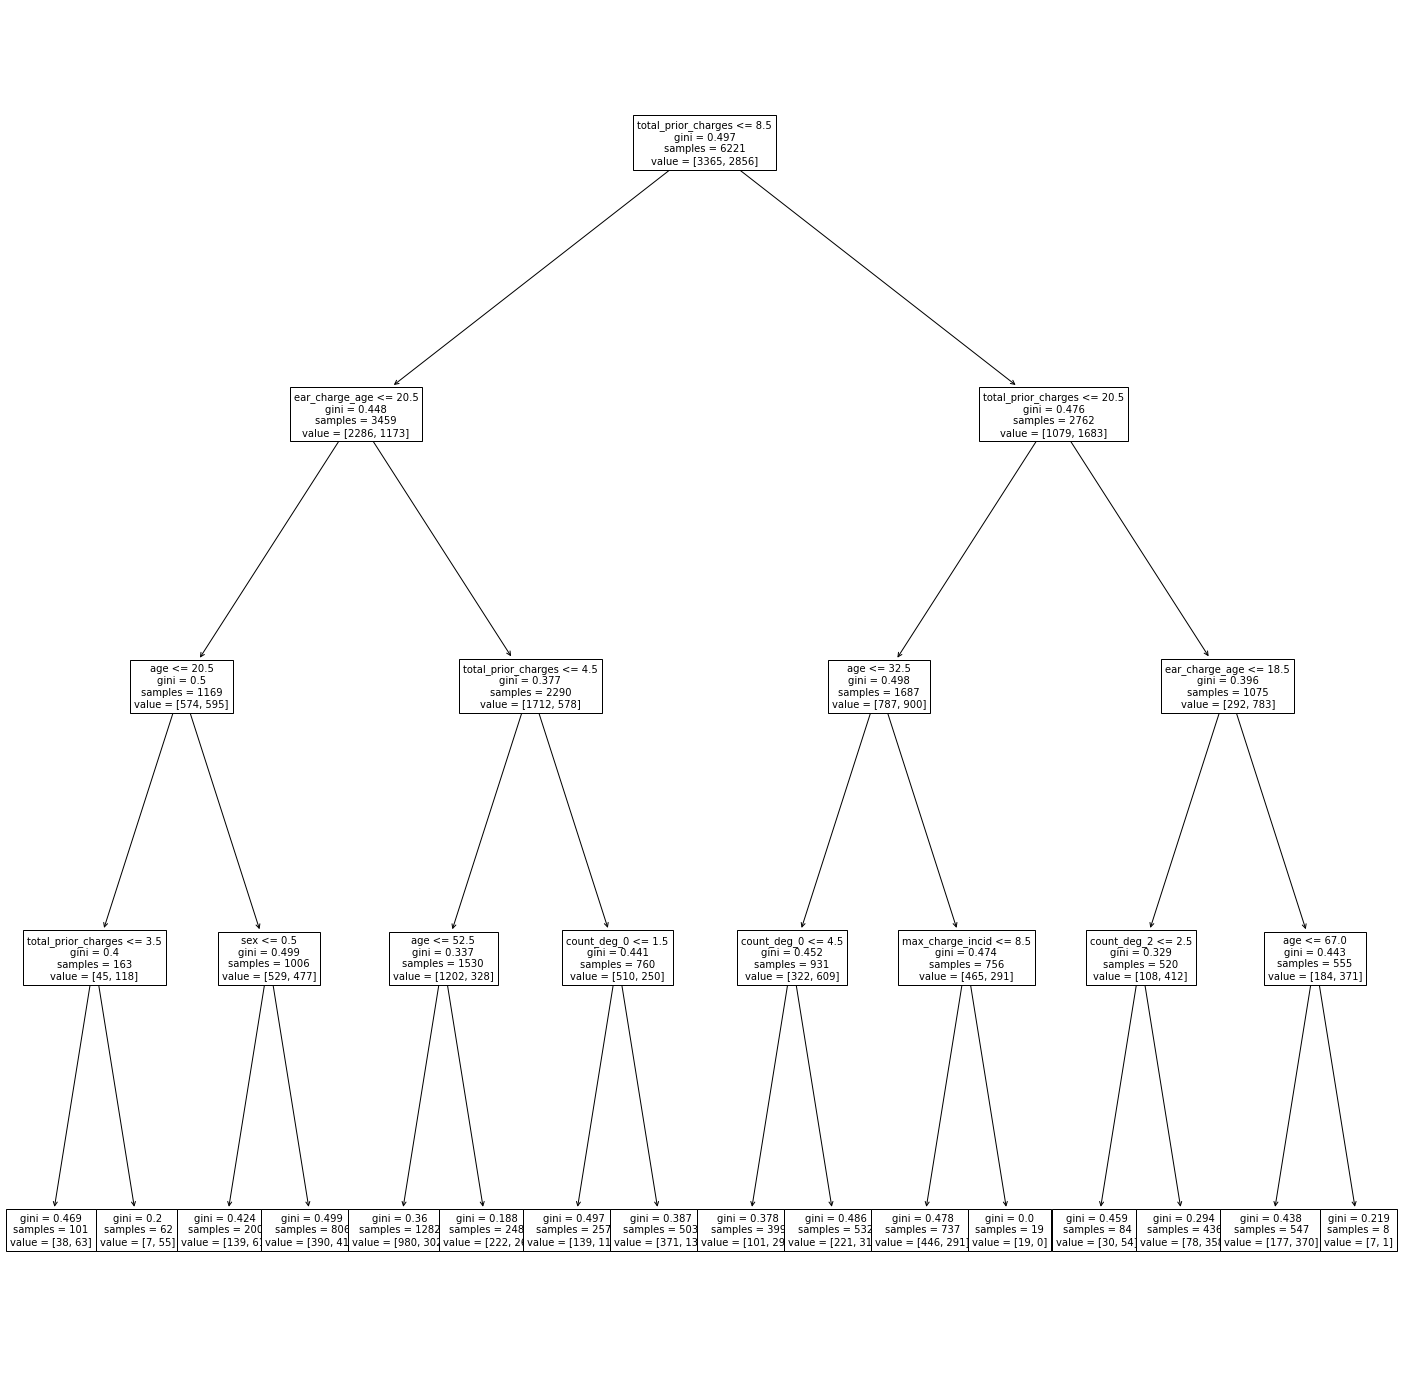

In [459]:
#plot_tree(clf, feature_names = list(X.columns))

#plt.figure(figsize=(1000,1000))

plt.figure(figsize=(25,25))  # set plot size (denoted in inches)
tree.plot_tree(clf, fontsize=10, feature_names = X_no_dumm .columns)
plt.show()


As evident by the first look at the tree and the aforementioned model agnostic and specific analysis, it seems that race doesn't have a high influence on the model. The question though remains, why does the model have such contradicting results for the different races? <br>
<br> 
To put this in perspective, we will now fit the model without it knowing the race as a feature and compare the results.

### <a name="log-excl-race"></a>Logistic Regression excluding race

At first we drop the feature race.

In [460]:
X_adj = X.drop(['race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_Native American', "race_Other"], axis = 1)

In [461]:
X_adj.head()

,sex_Male,marital_status_Married,marital_status_Separated,marital_status_Significant Other,marital_status_Single,marital_status_Unknown,marital_status_Widowed,age,juv_fel_count,juv_misd_count,juv_other_count,highest_degree_charged,count_deg_0,count_deg_1,count_deg_2,count_deg_3,count_deg_4,count_deg_5,total_prior_charges,max_charge_incid,ear_charge_age
0,1,0,0,0,1,0,0,0.994494,0.0,0.0,0.000000,0.455455,0.646146,0.000000,0.382883,0.462462,0.000000,0.0,0.438438,0.314314,0.992993
1,1,0,0,0,1,0,0,0.585085,0.0,0.0,0.000000,0.455455,0.000000,0.000000,0.000000,0.462462,0.000000,0.0,0.000000,0.000000,0.756256
2,1,0,0,0,1,0,0,0.191692,0.0,0.0,0.951952,0.455455,0.751752,0.751752,0.909409,0.837838,0.000000,0.0,0.807307,0.845345,0.104104
5,1,0,1,0,0,0,0,0.783283,0.0,0.0,0.000000,0.134134,0.000000,0.000000,0.382883,0.000000,0.000000,0.0,0.000000,0.000000,0.891391
6,1,0,0,0,1,0,0,0.736236,0.0,0.0,0.000000,0.793794,0.646146,0.751752,0.827828,0.977978,0.936937,0.0,0.893393,0.724224,0.332332


In [462]:
print(f"Our new dataframe consists of the following features: \n {X_adj.columns}")

Our new dataframe consists of the following features: 
 Index(['sex_Male', 'marital_status_Married', 'marital_status_Separated',
       'marital_status_Significant Other', 'marital_status_Single',
       'marital_status_Unknown', 'marital_status_Widowed', 'age',
       'juv_fel_count', 'juv_misd_count', 'juv_other_count',
       'highest_degree_charged', 'count_deg_0', 'count_deg_1', 'count_deg_2',
       'count_deg_3', 'count_deg_4', 'count_deg_5', 'total_prior_charges',
       'max_charge_incid', 'ear_charge_age'],
      dtype='object')


We again stratify our data first:

In [463]:
sum(y_1)/len(y_1)

X_train, X_test, y_train, y_test = train_test_split(X_adj, y_1 ,random_state = 42, stratify = y_1)

sum(y_train)/len(y_train)

sum(y_test)/len(y_test)

0.4588688946015424

We fit our model to the new dataframe using the same hyperparameters

In [464]:
log_feat = LogisticRegression(penalty = best_param_log["penalty"], random_state = 42, max_iter = 10000, tol = 0.1)

log_feat.fit(X_train, y_train)

y_pred_proba_log = log_feat.predict_proba(X_test)[:,1]

y_pred_log = log_feat.predict(X_test)

The AUC of our model is 0.7574161493576053


Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


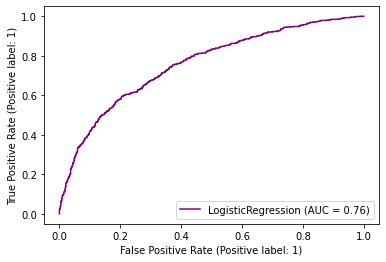

In [465]:
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, y_pred_proba_log)

plot_roc_curve(log_feat, X_test, y_test, color="purple")

roc_auc_log = auc(fpr_log, tpr_log)

print(f"The AUC of our model is {roc_auc_log}")

Performance - Without Race


Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


632 210 274 440
The Accuracy is 0.69
The False-negative-rate is 0.38
The False-positive-rate is 0.25
The Sensitivity or True-positive-rate is 0.62
The Specitivity or True-negative-rate is 0.75
The Positive-predictive value or precision is 0.68
The Negative-predictive value or recall is 0.7


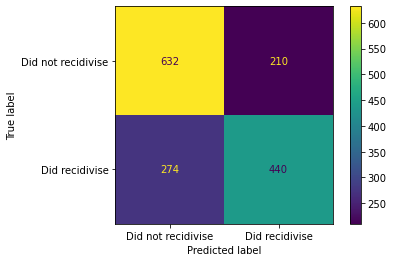

In [467]:
print("Performance - Without Race")

confusionmatrix(log_feat, X_test, y_test, y_pred_log)

Performance - With Race <br>
<br>
The Accuracy is 0.69 <br> 
The False-negative-rate is 0.38<br> 
The False-positive-rate is 0.26<br> 
The Sensitivity or True-positive-rate is 0.62<br> 
The Specitivity or True-negative-rate is 0.74<br> 
The Positive-predictive value or precision is 0.67<br> 
The Negative-predictive value or recall is 0.7

We can observe that there are no chances to the accuracy of our model, whereas only the False-positive-rate decreased by 1 % and the True-negative-rate increased by 1%.<br>
Even though the changes seem minor, it let's us to believe that the race does have an impact on our model. <br>
In order to compare this we will now compare how the model would affect African Americans, wthout the model even knowing about the race. 

### <a name="excl-race-effect-race"></a>The effect of race on our model without the model knowing the feature

In [468]:
X_test_copy2 = X_test.copy()
X_test_copy2.head()

,sex_Male,marital_status_Married,marital_status_Separated,marital_status_Significant Other,marital_status_Single,marital_status_Unknown,marital_status_Widowed,age,juv_fel_count,juv_misd_count,juv_other_count,highest_degree_charged,count_deg_0,count_deg_1,count_deg_2,count_deg_3,count_deg_4,count_deg_5,total_prior_charges,max_charge_incid,ear_charge_age
1664,0,0,0,0,1,0,0,0.191692,0.0,0.0,0.0,0.455455,0.000000,0.512513,0.000000,0.462462,0.000000,0.0,0.152152,0.000000,0.332332
2220,1,1,0,0,0,0,0,0.736236,0.0,0.0,0.0,0.793794,0.000000,0.000000,0.748248,0.000000,0.771772,0.0,0.315816,0.724224,0.862362
2023,1,0,0,0,1,0,0,0.611111,0.0,0.0,0.0,0.134134,0.486486,0.661161,0.382883,0.000000,0.000000,0.0,0.381381,0.314314,0.518018
1927,1,0,0,0,1,0,0,0.768268,0.0,0.0,0.0,0.134134,0.486486,0.000000,0.827828,0.000000,0.000000,0.0,0.438438,0.910911,0.881882
5421,1,0,0,0,1,0,0,0.330831,0.0,0.0,0.0,0.134134,0.646146,0.661161,0.382883,0.000000,0.000000,0.0,0.489489,0.541041,0.409910


Given the fact that we used the same random state for the classification, we can now use the dummy encoded attributes and add them back to our test set. 

In [469]:
X_test_copy2["race_Asian"] = X_test_copy["race_Asian"]

X_test_copy2["race_Caucasian"] = X_test_copy["race_Caucasian"]

X_test_copy2["race_Hispanic"] = X_test_copy["race_Hispanic"]

X_test_copy2["race_Native American"] = X_test_copy["race_Native American"]

X_test_copy2["race_Other"] = X_test_copy["race_Other"]

As we can observe, the different races are again part of our features

In [470]:
X_test_copy2.head()

,sex_Male,marital_status_Married,marital_status_Separated,marital_status_Significant Other,marital_status_Single,marital_status_Unknown,marital_status_Widowed,age,juv_fel_count,juv_misd_count,juv_other_count,highest_degree_charged,count_deg_0,count_deg_1,count_deg_2,count_deg_3,count_deg_4,count_deg_5,total_prior_charges,max_charge_incid,ear_charge_age,race_Asian,race_Caucasian,race_Hispanic,race_Native American,race_Other
1664,0,0,0,0,1,0,0,0.191692,0.0,0.0,0.0,0.455455,0.000000,0.512513,0.000000,0.462462,0.000000,0.0,0.152152,0.000000,0.332332,0,0,0,0,0
2220,1,1,0,0,0,0,0,0.736236,0.0,0.0,0.0,0.793794,0.000000,0.000000,0.748248,0.000000,0.771772,0.0,0.315816,0.724224,0.862362,0,0,1,0,0
2023,1,0,0,0,1,0,0,0.611111,0.0,0.0,0.0,0.134134,0.486486,0.661161,0.382883,0.000000,0.000000,0.0,0.381381,0.314314,0.518018,0,0,0,0,0
1927,1,0,0,0,1,0,0,0.768268,0.0,0.0,0.0,0.134134,0.486486,0.000000,0.827828,0.000000,0.000000,0.0,0.438438,0.910911,0.881882,0,1,0,0,0
5421,1,0,0,0,1,0,0,0.330831,0.0,0.0,0.0,0.134134,0.646146,0.661161,0.382883,0.000000,0.000000,0.0,0.489489,0.541041,0.409910,0,0,0,0,0


Now we add back our predictions and true values for the model without race as a feature

In [471]:
X_test_copy2["predictions"] = y_pred_log
X_test_copy2["true_values"] = y_test

In [472]:
X_test_copy2.head()

,sex_Male,marital_status_Married,marital_status_Separated,marital_status_Significant Other,marital_status_Single,marital_status_Unknown,marital_status_Widowed,age,juv_fel_count,juv_misd_count,juv_other_count,highest_degree_charged,count_deg_0,count_deg_1,count_deg_2,count_deg_3,count_deg_4,count_deg_5,total_prior_charges,max_charge_incid,ear_charge_age,race_Asian,race_Caucasian,race_Hispanic,race_Native American,race_Other,predictions,true_values
1664,0,0,0,0,1,0,0,0.191692,0.0,0.0,0.0,0.455455,0.000000,0.512513,0.000000,0.462462,0.000000,0.0,0.152152,0.000000,0.332332,0,0,0,0,0,0,0
2220,1,1,0,0,0,0,0,0.736236,0.0,0.0,0.0,0.793794,0.000000,0.000000,0.748248,0.000000,0.771772,0.0,0.315816,0.724224,0.862362,0,0,1,0,0,0,1
2023,1,0,0,0,1,0,0,0.611111,0.0,0.0,0.0,0.134134,0.486486,0.661161,0.382883,0.000000,0.000000,0.0,0.381381,0.314314,0.518018,0,0,0,0,0,0,0
1927,1,0,0,0,1,0,0,0.768268,0.0,0.0,0.0,0.134134,0.486486,0.000000,0.827828,0.000000,0.000000,0.0,0.438438,0.910911,0.881882,0,1,0,0,0,0,0
5421,1,0,0,0,1,0,0,0.330831,0.0,0.0,0.0,0.134134,0.646146,0.661161,0.382883,0.000000,0.000000,0.0,0.489489,0.541041,0.409910,0,0,0,0,0,0,0


In [473]:
X_test_copy2.shape

(1556, 28)

Now that we have dataframe with race included back again, we can use that to compare the effect on the different races, without the model ever knowing the race.

In [474]:
# subset for race african american 

X_afr = X_test_copy2[(X_test_copy2["race_Asian"] == 0) & (X_test_copy2["race_Caucasian"] == 0) & (X_test_copy2["race_Hispanic"] == 0) & (X_test_copy2["race_Native American"] == 0) & (X_test_copy2["race_Other"] == 0)]

X_rest = X_test_copy2[(X_test_copy2["race_Asian"] != 0) | (X_test_copy2["race_Caucasian"] != 0) | (X_test_copy2["race_Hispanic"] != 0) | (X_test_copy2["race_Native American"] != 0) | (X_test_copy2["race_Other"] != 0)]

In [475]:
print(X_afr.shape, X_rest.shape)

(822, 28) (734, 28)


Again we see that subsetting the dataframe was successful.

In [480]:
print("AFRICAN AMERICAN - Without Race")

confusion_matrix_rate(X_afr["true_values"], X_afr["predictions"])

AFRICAN AMERICAN - Without Race
289 281 122 130
The False-negative-rate is 0.31
The False-positive-rate is 0.3
The Sensitivity or True-positive-rate is 0.69
The Specitivity or True-negative-rate is 0.7
The Positive-predictive value or precision is 0.7
The Negative-predictive value or recall is 0.68
The Accuracy is 0.69


In [481]:
print("NON AFRICAN-AMERICAN - Without Race")

confusion_matrix_rate(X_rest["true_values"], X_rest["predictions"])

NON AFRICAN-AMERICAN - Without Race
151 351 88 144
The False-negative-rate is 0.49
The False-positive-rate is 0.2
The Sensitivity or True-positive-rate is 0.51
The Specitivity or True-negative-rate is 0.8
The Positive-predictive value or precision is 0.63
The Negative-predictive value or recall is 0.71
The Accuracy is 0.68


As a reminder, the metrics for the confusion matrices for African-americans and non-African-Americans with the model knowing the feature: <br>
<br>
AFRICAN AMERICAN - With Race <br>
297 269 134 122<br>
The False-negative-rate is 0.29<br>
The False-positive-rate is 0.33<br>
The Sensitivity or True-positive-rate is 0.71<br>
The Specitivity or True-negative-rate is 0.67<br>
The Positive-predictive value or precision is 0.69<br>
The Negative-predictive value or recall is 0.69<br>
The Accuracy is 0.69<br>
<br>
NON AFRICAN-AMERICAN - With Race<br>
144 356 83 151<br>
The False-negative-rate is 0.51<br>
The False-positive-rate is 0.19<br>
The Sensitivity or True-positive-rate is 0.49<br>
The Specitivity or True-negative-rate is 0.81<br>
The Positive-predictive value or precision is 0.63<br>
The Negative-predictive value or recall is 0.7<br>
The Accuracy is 0.68

At first glance we can observe a slight difference in the model's False-positive-rate regarding African Americans of around 3 %. On second notice, we can see that the True-positive-rate will increase by around 2 %. <br>
In comparison to that, the False-negative-rate for Non African Americans decreases by around 2 %, with a slight increase of the True-negative-rate by 1 %. <br>
<br>
Despite this being positive signs, meaning that race should not be included as a feature, the proportions hardly change, meaning that despite the model ever knowing about race, it is still far more likely to commit the same mistakes as above - in favour of Non-African Americans and against African Americans. Having in mind the model never knew about the race of the defendant, we asked ourselves how that could be possible?<br>
<br> 
Our intuition is, that there exist features that are impacted by the race and as such still carry the race within them - impacting our target:

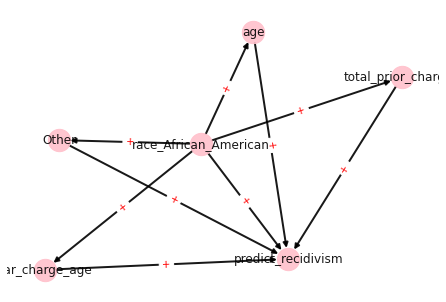

In [493]:
DAG = nx.DiGraph()
DAG.add_edges_from([("race_African_American", "total_prior_charges"), ("race_African_American", "ear_charge_age"), ("race_African_American", "age"), ("race_African_American", "age"), ("race_African_American", "Other"),
                   ("total_prior_charges", "predict_recidivism"), ("ear_charge_age", "predict_recidivism"), ("age", "predict_recidivism"), ("Other", "predict_recidivism"), ("race_African_American", "predict_recidivism")])
#credit for this part: https://stackoverflow.com/questions/47094949/labeling-edges-in-networkx
pos = nx.spring_layout(DAG)
nx.draw(
    DAG, pos, edge_color='black', width=2, linewidths=1,
    node_size=500, node_color='pink', alpha=0.9,
    labels={node: node for node in DAG.nodes()}
)
nx.draw_networkx_edge_labels(
    DAG, pos,
    edge_labels={("race_African_American", "total_prior_charges") : "+", 
                 ("race_African_American", "ear_charge_age"): "+", 
                 ("race_African_American", "age"): "+", 
                 ("race_African_American", "age"): "+", 
                 ("race_African_American", "Other"): "+",
                   ("total_prior_charges", "predict_recidivism"):"+", 
                 ("ear_charge_age", "predict_recidivism"):"+", 
                 ("age", "predict_recidivism"):"+", 
                 ("Other", "predict_recidivism"):"+", 
                 ("race_African_American", "predict_recidivism"):"+"},
    font_color='red'
)
plt.axis('off')
plt.show()

In order to test this notion, we concluded that if the features without race still include the race, we should be able to also predict whether a person is African American, based on the features.

### <a name="predict-race"></a>Predict race based on the features

In [502]:
df_2.head()

,is_recid,is_violent_recid,sex,race,age,juv_fel_count,juv_misd_count,juv_other_count,marital_status,highest_degree_charged,count_deg_0,count_deg_1,count_deg_2,count_deg_3,count_deg_4,count_deg_5,total_prior_charges,max_charge_incid,ear_charge_age,two_year_recid
0,0,0,1,0,69,0,0,0,4,3,4,0,1,1,0,0,6,2,62,0
1,1,1,1,1,34,0,0,0,4,3,0,0,0,1,0,0,1,1,31,1
2,1,0,1,1,24,0,0,1,4,3,6,3,6,4,0,0,19,5,17,1
5,0,0,1,0,44,0,0,0,2,2,0,0,1,0,0,0,1,1,42,0
6,1,0,1,0,41,0,0,0,4,4,4,3,4,13,3,0,27,4,19,1


Given that African-American is encoded 0 and the rest from 1-5, we will switch the encoding such that African-American = 1 and the rest 0

In [503]:
df_2["race"] = df_2["race"].apply(lambda x: 1 if x == 0 else 0)

In [504]:
df_2.head()

,is_recid,is_violent_recid,sex,race,age,juv_fel_count,juv_misd_count,juv_other_count,marital_status,highest_degree_charged,count_deg_0,count_deg_1,count_deg_2,count_deg_3,count_deg_4,count_deg_5,total_prior_charges,max_charge_incid,ear_charge_age,two_year_recid
0,0,0,1,1,69,0,0,0,4,3,4,0,1,1,0,0,6,2,62,0
1,1,1,1,0,34,0,0,0,4,3,0,0,0,1,0,0,1,1,31,1
2,1,0,1,0,24,0,0,1,4,3,6,3,6,4,0,0,19,5,17,1
5,0,0,1,1,44,0,0,0,2,2,0,0,1,0,0,0,1,1,42,0
6,1,0,1,1,41,0,0,0,4,4,4,3,4,13,3,0,27,4,19,1


We now assign our target to race and drop the prior targets regarding recidivism 

In [505]:
y_2 = df_2["race"]

X_2 = df_2.drop(['is_recid', 'is_violent_recid', 'two_year_recid', "race"], axis = 1)

In [506]:
X_2.head()

,sex,age,juv_fel_count,juv_misd_count,juv_other_count,marital_status,highest_degree_charged,count_deg_0,count_deg_1,count_deg_2,count_deg_3,count_deg_4,count_deg_5,total_prior_charges,max_charge_incid,ear_charge_age
0,1,69,0,0,0,4,3,4,0,1,1,0,0,6,2,62
1,1,34,0,0,0,4,3,0,0,0,1,0,0,1,1,31
2,1,24,0,0,1,4,3,6,3,6,4,0,0,19,5,17
5,1,44,0,0,0,2,2,0,0,1,0,0,0,1,1,42
6,1,41,0,0,0,4,4,4,3,4,13,3,0,27,4,19


In [507]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.3, random_state=42)

Instead of a logistic regression, we now use a GradientBoostingClassifier to test our idea. We won't hyperparametertune this model but instead use the default. 

In [508]:
clf_gb = GradientBoostingClassifier(learning_rate=0.01, random_state=42)
clf_gb.fit(X_train, y_train)
y_pred = clf_gb.predict(X_test)

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


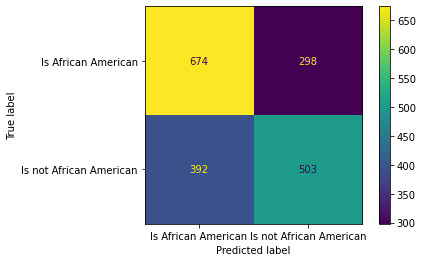

In [512]:
conf_mat_log = plot_confusion_matrix(clf_gb,
                     X_test,
                     y_test,
                      values_format='d',
                     display_labels=["Is African American","Is not African American"])

In [517]:
print(f"The predictive accuracy of the Gradient Boosting Classifier is: {clf_gb.score(X_test, y_test)}")

The predictive accuracy of the Gradient Boosting Classifier is: 0.6304231387252276


In [518]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print(tn, fp, fn, tp)

674 298 392 503


In [520]:
fnr = fn/(fn+tp)

fpr = fp/(fp+tn)

tpr = tp/(tp+fn)

tnr = tn/(tn+fp)

ppv = tp/(tp+fp)

npv = tn/(tn+fn)
print("Predicting an African American based on our features:")

print(f"The False-negative-rate is {np.round(fnr, 2)}")
print(f"The False-positive-rate is {np.round(fpr, 2)}")
print(f"The Sensitivity or True-positive-rate is {np.round(tpr, 2)}")
print(f"The Specitivity or True-negative-rate is {np.round(tnr, 2)}")
#print(f"The Accuracy is {np.round(acc, 2)}")
print(f"The Positive-predictive value or precision is {np.round(ppv, 2)}")
print(f"The Negative-predictive value or recall is {np.round(npv, 2)}")

Predicting an African American based on our features:
The False-negative-rate is 0.44
The False-positive-rate is 0.31
The Sensitivity or True-positive-rate is 0.56
The Specitivity or True-negative-rate is 0.69
The Positive-predictive value or precision is 0.63
The Negative-predictive value or recall is 0.63


To understand the metrics above, we can see that we still have a high likelihood of making a mistake, i.e. declaring a person as non-black even though they are not. <br>
However, considering the fact that the model was making wrongful assumptions for Non-african americans in the models above using the same feature, we now observe the same effect in the opposite direction.<br>
Overall the model is not performing much worse in a classification task than the Compass algorithms used in court - with the difference, however, that we are now predicting the race!<br>
More interesting is now to look at what drives our model to that decision making, which features are relevant to determine the race?

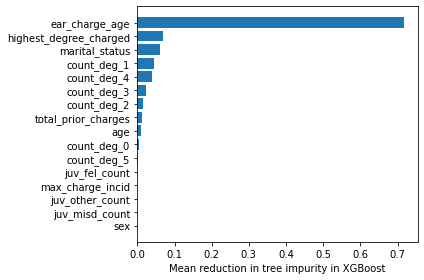

In [521]:
# Permutation feature importance
imp_df = pd.DataFrame({'feature': X_train.columns.values,
                       'importance': clf_gb.feature_importances_})
 
# Reorder by importance
ordered_df = imp_df.sort_values(by='importance')
imp_range=range(1,len(imp_df.index)+1)
 
## Barplot with confidence intervals
height = ordered_df['importance']
bars = ordered_df['feature']
y_pos = np.arange(len(bars))

# Create horizontal bars
plt.barh(y_pos, height)
 
# Create names on the y-axis
plt.yticks(y_pos, bars)

plt.xlabel("Mean reduction in tree impurity in XGBoost")

plt.tight_layout()
# Show graphic
plt.show()

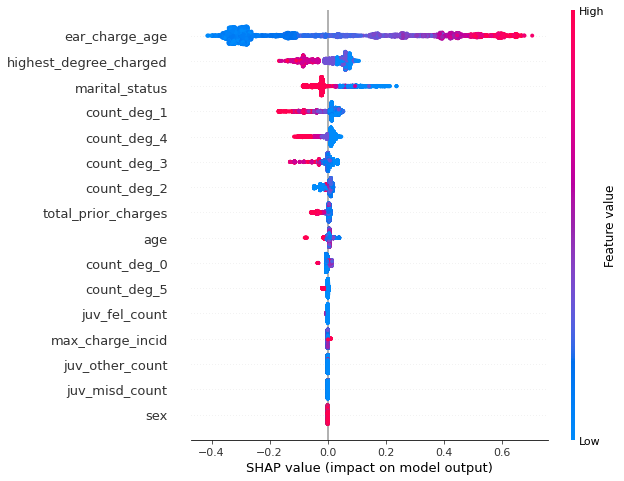

In [522]:
# Shap Feature importance
import shap
explainer = shap.TreeExplainer(clf_gb)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

Taking the Shap values above into account, our model confirms our initial hypothesis and tells a pretty sad story:<br>
The younger you are charged with a crime, the more likely you are to be African American! <br>
We will confirm this notion in the other notebooks and give an explanation below.<br>


### <a name="final-conc"></a>Final Conclusions

Regarding the spillover effect of race on our other features and the consequent racial bias introduced into our model, we recommend against using a binary classifier in court. Since the variable race seems to be a cofounding effect for the other features, and given the method of data collection through potential racist arrests, our model will become racist as well. To strongly back up our assumption that the features such as Age and Total Prior Charges are racially biased, we have gathered some statistics related to crime force in the US. <br>
<br>
It is recorded that African-Americans are being arrested at a much higher rates than whites. For example, African-Americans and Hispanics make up 32% of the US population, but more than half of the US incarcerated population is represented by African-Americans and Hispanics. In particular, African Americans are incarcerated at more than 5 times the rate of whites. Therefore, it is no doubt that the total prior charges of African-American will be significantly higher than whites. The article we found went as far as saying that If African Americans and Hispanics were incarcerated at the same rates as whites, prison and jail populations would decline by almost 40%. <br>
<br>
Regarding age, African-American children make up 14% of the population but they represent 32% of children who are arrested, 42% of children who are detained, and 52% of children whose cases are judicially waived to criminal court.
With this statistics, we can clearly see that African-American are much more likely to be arrested and imprisoned for it, and the effect of incarceration is consequential. Inmates are more likely to be mentally distressed, to lose their rights to vote, to have a hard time finding a job, and therefore leads to vulnerability to disease and premature death. This does not only removes African-American votes, workers and taxpayers; but also put a strain on their children. The children of inmates suffer more from antisocial behavior, expulsion from school, financial hardship and more likely to be involved in criminal activities. <br>
<br>
The article used for research was taken from here: https://naacp.org/resources/criminal-justice-fact-sheet <br>
<br>
If we use machine learning model based on racially discriminating features such as total prior charges and age, we will keep making decisions against African-American race and put them in further disadvantage compared to other races. The loop of racism can never be broken.

We will continue with the next notebook and confirm our findings by introducing a random forest classifier.

### <a name="appendix"></a>Appendix

#### Ridge 

In comparison to the Logistic Regression, we will now introduce a shrinkage method, to see whether it will perform similarly and if yes, whether the same features play a role in making a prediction.

In [536]:
X_train, X_test, y_train, y_test = train_test_split(X, y_1 ,random_state = 42, stratify = y_1)

#### Hyperparametertuning & Modeling

In [537]:
ridge = RidgeClassifier(alpha = 0.1, solver = "auto")

params = {"alpha":np.arange(0.01, 1, 0.01), "solver":['auto', 'sparse_cg', 'cholesky', 'svd' ,'lsqr', 'sag', 'saga']}

gd_ridge = GridSearchCV(ridge, param_grid = params, cv = 5)

gd_ridge.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RidgeClassifier(alpha=0.1),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]),
                         'solver': ['auto', 'sparse_cg', 'cholesky', 'svd',
                                    'lsqr', 'sag', 'saga']})

In [538]:
alpha_opt = gd_ridge.best_params_['alpha']

solver = gd_ridge.best_params_['solver']

print(f"The best parameter for alpha is: {alpha_opt}")
print(f"The best solver is: {solver}")

The best parameter for alpha is: 0.17
The best solver is: sparse_cg


Before using the optimal parameter determined by our gridsearch, let's visualize the effect of alpha on the features

We use the Hypaerparameters for the construcion of the model

In [539]:
ridge = RidgeClassifier(alpha = alpha_opt, solver = solver)

ridge_tuned = ridge.fit(X_train, y_train)

ridge_pred = ridge_tuned.predict(X_test)

In [540]:
print(f"The predictive accuracy of the Ridge Classifier is: {ridge_tuned.score(X_test, y_test)}")

The predictive accuracy of the Ridge Classifier is: 0.6850899742930592


#### Interpretation of Ridge & Performance

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


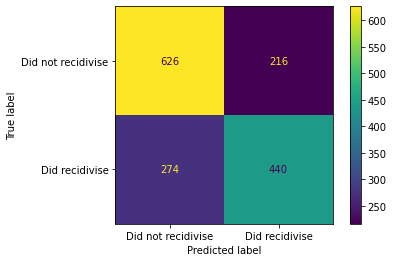

In [541]:
conf_mat_lasso = plot_confusion_matrix(ridge_tuned,
                     X_test,
                     y_test,
                      values_format='d',
                     display_labels=["Did not recidivise","Did recidivise"])

In [542]:
tn, fp, fn, tp = confusion_matrix(y_test, ridge_pred).ravel()

print(tn, fp, fn, tp)

626 216 274 440


In [543]:
fnr = fn/(fn+tp)

fpr = fp/(fp+tn)

tpr = tp/(tp+fn)

tnr = tn/(tn+fp)

ppv = tp/(tp+fp)

npv = tn/(tn+fn)

print(f"The False-negative-rate is {np.round(fnr, 2)}")
print(f"The False-positive-rate is {np.round(fpr, 2)}")
print(f"The Sensitivity or True-positive-rate is {np.round(tpr, 2)}")
print(f"The Specitivity or True-negative-rate is {np.round(tnr, 2)}")
print(f"The Positive-predictive value or precision is {np.round(ppv, 2)}")
print(f"The Negative-predictive value or recall is {np.round(npv, 2)}")

The False-negative-rate is 0.38
The False-positive-rate is 0.26
The Sensitivity or True-positive-rate is 0.62
The Specitivity or True-negative-rate is 0.74
The Positive-predictive value or precision is 0.67
The Negative-predictive value or recall is 0.7


#### Interpretation Ridge

Similarly to the Logistic Regression, we observe a higher False-negative-Rate and higher Specitivity for Ridge Classifier. As such, our conclusion for the Logistic regression, we are better at predicting the people that do not recidivise, holds. <br>
Let us know look at the feature importamce of the Ridge Regression.

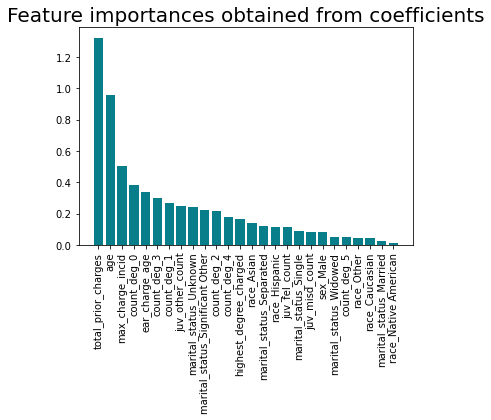

In [544]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(ridge_tuned.coef_[0])
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

We observe the same pattern as with the logistic regression, age and total prior charges dominate, with count degree 1 as the second most important feature.

Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead


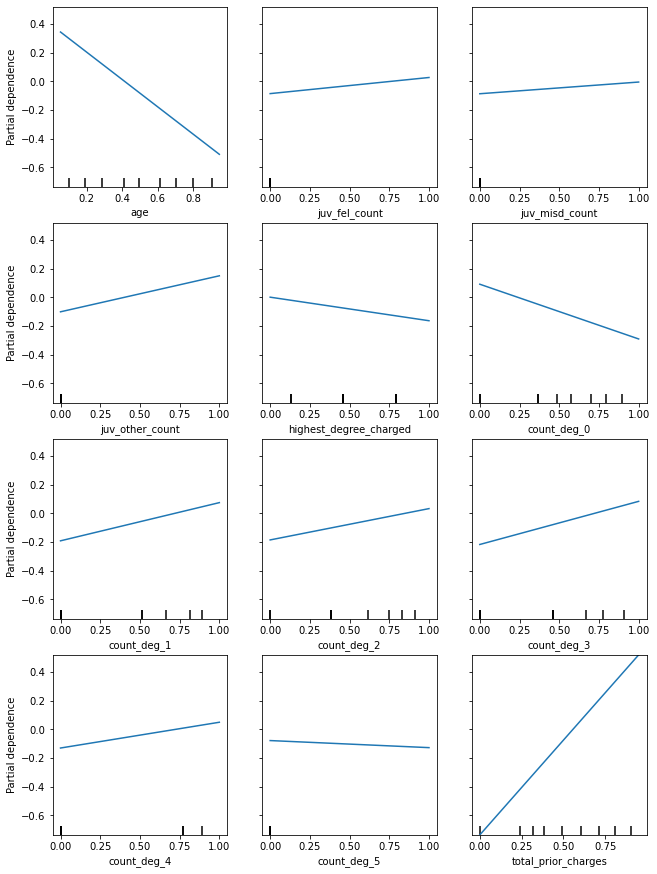

In [545]:
display = plot_partial_dependence(ridge_tuned, X_train, features[12:25], n_jobs=11 ,grid_resolution=50, kind="average")

plt.subplots_adjust(top = 3, right = 1.5)


The PDP's confirm our model's coeeficients.

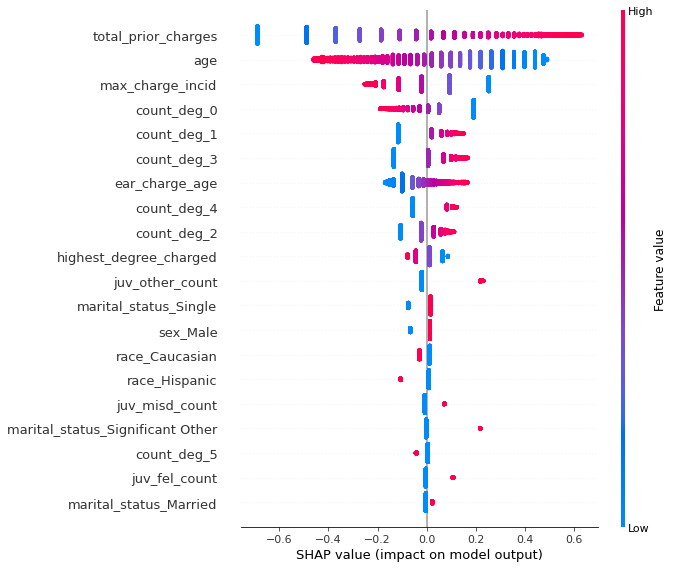

In [546]:
import shap

# explain the model's predictions on test set using SHAP values
# same syntax works for xgboost, LightGBM, CatBoost, and some scikit-learn models
explainer = shap.LinearExplainer(ridge_tuned, X_train)

# shap_values consists of a list of two matrices of dimension samplesize x #features
# The first matrix uses average nr of "is_recid = 0" as base value
# The second matrix which is used below uses average nr of "is_recid = 1" as base value 
shap_values = explainer.shap_values(X_train)

#A summary plot with the shapley value (feature importance) 
shap.summary_plot(shap_values, X_train)

The ridge classifier seems to behave no different from the logistic regression in relation to feature importance and similarly in its accuracy metrics. <br>
Again, we seem to be better at predicting the people that do not recidivise than the people that do. As a final classification model, we will compare knn to the other models.

#### K-nearest Neighbors

Given the performances of the two linear models, we will try another classifier, knn

In [547]:
knn = KNeighborsClassifier(n_neighbors = 5, weights = "uniform", algorithm = "auto")

params = {"n_neighbors":np.arange(1,100), "weights":["uniform", "distance"], "algorithm":["auto", "ball_tree", "kd_tree", "brute"]}

gd_knn = GridSearchCV(knn, param_grid=params, cv = 5)

gd_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'weights': ['uniform', 'distance']})

In [548]:
n_neighbors = gd_knn.best_params_['n_neighbors']

weights = gd_knn.best_params_['weights']

algorithm = gd_knn.best_params_['algorithm']

print(f"The best parameter for n_neighbors is: {n_neighbors}")

print(f"The best parameter for weights is: {weights}")

print(f"The best parameter for algorithm is: {algorithm}")

The best parameter for n_neighbors is: 93
The best parameter for weights is: distance
The best parameter for algorithm is: auto


In [549]:
knn = KNeighborsClassifier(n_neighbors = n_neighbors, weights = weights, algorithm = algorithm)

knn_tuned= knn.fit(X_train, y_train)

y_pred_knn = knn_tuned.predict(X_test)

y_pred_proba_knn = knn.predict_proba(X_test)[:,1]

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


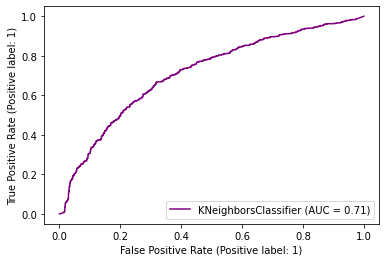

In [550]:
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_proba_knn)

plot_roc_curve(knn_tuned, X_test, y_test, color="purple")

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


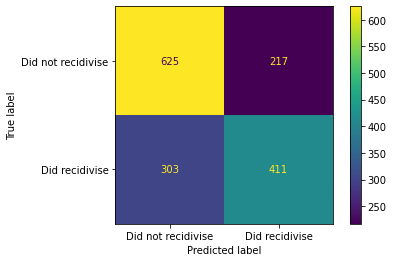

In [551]:
conf_mat_lasso = plot_confusion_matrix(knn_tuned,
                     X_test,
                     y_test,
                      values_format='d',
                     display_labels=["Did not recidivise","Did recidivise"])

In [552]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_knn).ravel()

print(tn, fp, fn, tp)

625 217 303 411


In [555]:
fnr = fn/(fn+tp)

fpr = fp/(fp+tn)

tpr = tp/(tp+fn)

tnr = tn/(tn+fp)

ppv = tp/(tp+fp)

npv = tn/(tn+fn)

print(f"The False-negative-rate is {np.round(fnr, 2)}")
print(f"The False-positive-rate is {np.round(fpr, 2)}")
print(f"The Sensitivity or True-positive-rate is {np.round(tpr, 2)}")
print(f"The Specitivity or True-negative-rate is {np.round(tnr, 2)}")
print(f"The Positive-predictive value or precision is {np.round(ppv, 2)}")
print(f"The Negative-predictive value or recall is {np.round(npv, 2)}")

The False-negative-rate is 0.42
The False-positive-rate is 0.26
The Sensitivity or True-positive-rate is 0.58
The Specitivity or True-negative-rate is 0.74
The Positive-predictive value or precision is 0.65
The Negative-predictive value or recall is 0.67


In [556]:
print(f"Our Accuracy of the knn is: {knn.score(X_test, y_test)}")

Our Accuracy of the knn is: 0.6658097686375322


#### Interpretation
Again we observe the same pattern, a much higher False-negative rate in comparison to a lower False-positive-rate, whereas the Specitivity is also higher than the Sensitivity. 

Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead


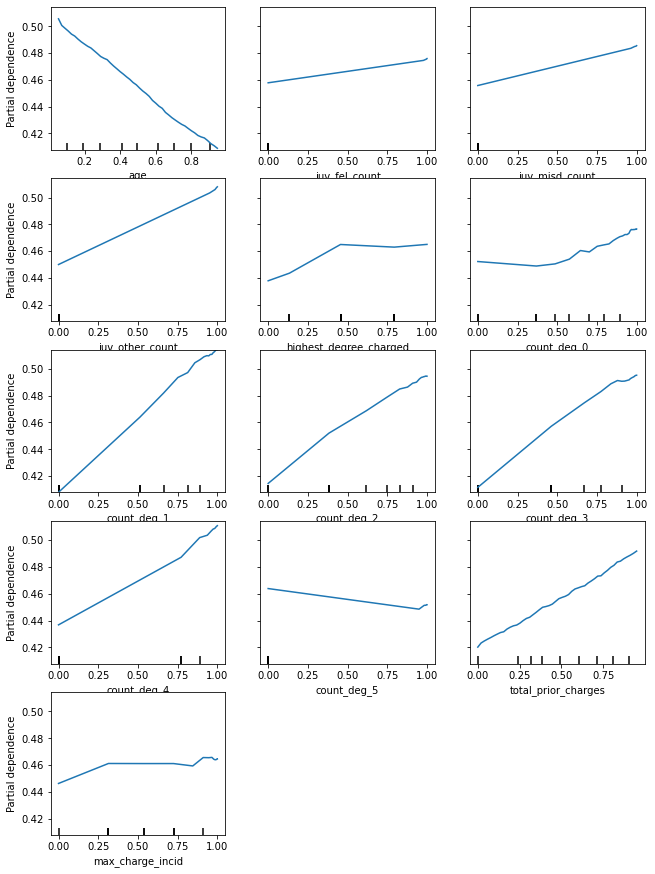

In [557]:
display = plot_partial_dependence(knn_tuned, X_train, features[12:25], grid_resolution=50, kind="average", )

plt.subplots_adjust(top = 3, right = 1.5)